## 股票组2 -- 项目中期汇报

# Data

In [ ]:
start = "2003-01-01"
end = "2018-01-01"

hist.get_stock_data("AAPL", start_date=start, end_date=end)
process = DataProcessing("stock_prices.csv", 0.9)
process.gen_test(10) #滑动窗口构建测试样本
process.gen_train(10) #滑动窗口构建训练样本

X_train = process.X_train / 200 #归一化方法？是否比x' = (x-min/max-min)更靠谱？
Y_train = process.Y_train / 200

X_test = process.X_test / 200
Y_test = process.Y_test / 200

所有股票数据都是从yahoo的数据接口获取，使用到的python库为yfinance，
输入参数为：
- 股票名称，如AAPL，601857.ss
- 起始日期
- 结束日期

In [ ]:
def get_stock_data(ticker, start_date, end_date):
    """
    Gets historical stock data of given tickers between dates
    :param ticker: company, or companies whose data is to fetched
    :type ticker: string or list of strings
    :param start_date: starting date for stock prices
    :type start_date: string of date "YYYY-mm-dd"
    :param end_date: end date for stock prices
    :type end_date: string of date "YYYY-mm-dd"
    :return: stock_data.csv
    """
    i = 1
    try:
        all_data = pdr.get_data_yahoo(ticker, start_date, end_date)
    except ValueError:
        print("ValueError, trying again")
        i += 1
        if i < 5:
            time.sleep(10)
            get_stock_data(ticker, start_date, end_date)
        else:
            print("Tried 5 times, Yahoo error. Trying after 2 minutes")
            time.sleep(120)
            get_stock_data(ticker, start_date, end_date)
    stock_data = all_data["Adj Close"] #adjclose,除权价格(前除权)
    stock_data.to_csv("stock_prices.csv",header=False)

stock_prices.csv数据如下：

2002-12-31,0.89
2003-01-02,0.92
2003-01-03,0.93
2003-01-06,0.93
2003-01-07,0.93
2003-01-08,0.91
2003-01-09,0.92
2003-01-10,0.92
2003-01-13,0.91
2003-01-14,0.91
2003-01-15,0.9
2003-01-16,0.91
2003-01-17,0.88
2003-01-21,0.87
2003-01-22,0.87
2003-01-23,0.88
2003-01-24,0.86
2003-01-27,0.88
2003-01-28,0.91
2003-01-29,0.93
2003-01-30,0.89

# Model & Baseline
我们采用MLP模型，后期会探索LSTM模型

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train, Y_train, epochs=100)

# Evaluation
使用2017-12-19至2018-01-03期间的数据作为测试集

In [ ]:
print(model.evaluate(X_test, Y_test))

# If instead of a full backtest, you just want to see how accurate the model is for a particular prediction, run this:
data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
stock = data["Adj Close"] #adjclose,除权价格(前除权)
X_predict = np.array(stock).reshape((1, 10)) / 200
print("predict:")
print(model.predict(X_predict)*200)

## 运行结果

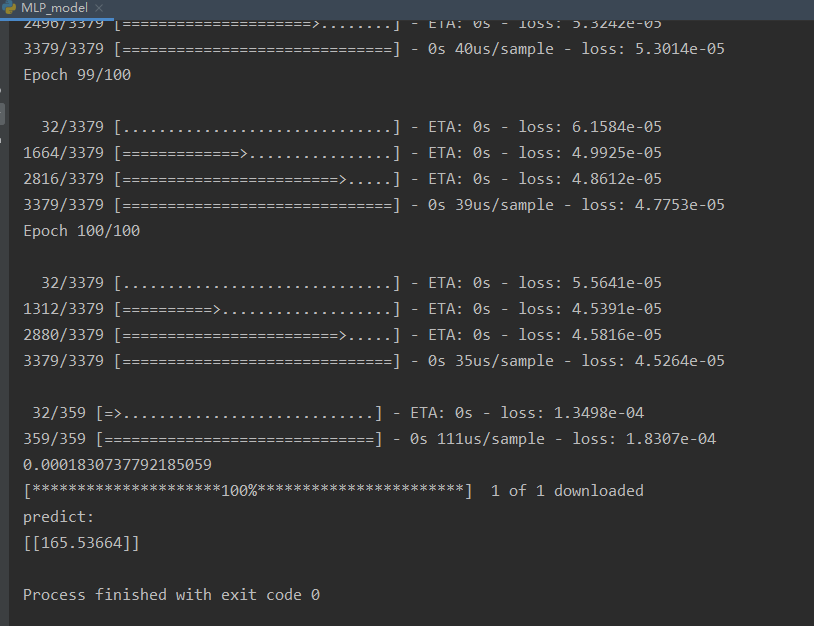